# Loading down all the module we are going to use through out this program.

In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import Image as Image_IP 
from IPython.display import display
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
import matplotlib.image as mpimg
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

## Setting up the main directory for the images to load from 

In [11]:
DATADIR = "/home/jovyan/work/TBX11K/imgs/"

# Better Formatting our data labels:

#### Loading and formating at the same time first for TBX11K_train

In [12]:
TBX11K_train=pd.read_csv("/home/jovyan/work/TBX11K/lists/TBX11K_train.txt", header=None)
TBX11K_train.columns=["directory"]
TBX11K_train[['Category(Label)','FileName']] = TBX11K_train["directory"].str.split('/', 1,expand=True)
TBX11K_train['directory']=(DATADIR+TBX11K_train['directory'])
TBX11K_train["Category(Integer)"]=TBX11K_train["Category(Label)"]
TBX11K_train["Category(Integer)"].replace({"tb": 0, "sick": 1,"health":2}, inplace=True)

In [13]:
TBX11K_train.sample(10)

,directory,Category(Label),FileName,Category(Integer)
3194,/home/jovyan/work/TBX11K/imgs/health/h4356.png,health,h4356.png,2
5253,/home/jovyan/work/TBX11K/imgs/sick/s2721.png,sick,s2721.png,1
5129,/home/jovyan/work/TBX11K/imgs/sick/s2520.png,sick,s2520.png,1
5501,/home/jovyan/work/TBX11K/imgs/sick/s3161.png,sick,s3161.png,1
3751,/home/jovyan/work/TBX11K/imgs/sick/s0253.png,sick,s0253.png,1
1720,/home/jovyan/work/TBX11K/imgs/health/h1866.png,health,h1866.png,2
2025,/home/jovyan/work/TBX11K/imgs/health/h2392.png,health,h2392.png,2
5345,/home/jovyan/work/TBX11K/imgs/sick/s2887.png,sick,s2887.png,1
3955,/home/jovyan/work/TBX11K/imgs/sick/s0606.png,sick,s0606.png,1
2270,/home/jovyan/work/TBX11K/imgs/health/h2825.png,health,h2825.png,2


#### Loading and formating at the same time now for TBX11K_trainval

In [14]:
TBX11K_trainval=pd.read_csv("/home/jovyan/work/TBX11K/lists/TBX11K_trainval.txt", header=None)
TBX11K_trainval.columns=["directory"]
TBX11K_trainval[['Category(Label)','FileName']]=TBX11K_trainval["directory"].str.split('/',1,expand=True)
TBX11K_trainval['directory']=(DATADIR+TBX11K_trainval['directory'])
TBX11K_trainval["Category(Integer)"]=TBX11K_trainval["Category(Label)"]
TBX11K_trainval["Category(Integer)"].replace({"tb": 0, "sick": 1,"health":2}, inplace=True)

In [15]:
TBX11K_trainval.sample(10)

,directory,Category(Label),FileName,Category(Integer)
3182,/home/jovyan/work/TBX11K/imgs/health/h3152.png,health,h3152.png,2
6817,/home/jovyan/work/TBX11K/imgs/sick/s2913.png,sick,s2913.png,1
8259,/home/jovyan/work/TBX11K/imgs/sick/s4814.png,sick,s4814.png,1
4873,/home/jovyan/work/TBX11K/imgs/sick/s0358.png,sick,s0358.png,1
7117,/home/jovyan/work/TBX11K/imgs/sick/s3300.png,sick,s3300.png,1
1632,/home/jovyan/work/TBX11K/imgs/health/h1082.png,health,h1082.png,2
1752,/home/jovyan/work/TBX11K/imgs/health/h1250.png,health,h1250.png,2
6473,/home/jovyan/work/TBX11K/imgs/sick/s2452.png,sick,s2452.png,1
2942,/home/jovyan/work/TBX11K/imgs/health/h2836.png,health,h2836.png,2
3092,/home/jovyan/work/TBX11K/imgs/health/h3035.png,health,h3035.png,2


#### Loading and formating at the same time now for TBX11K_val

In [16]:
TBX11K_val=pd.read_csv("/home/jovyan/work/TBX11K/lists/TBX11K_val.txt", header=None)
TBX11K_val.columns=["directory"]
TBX11K_val[['Category(Label)','FileName']]=TBX11K_val["directory"].str.split('/',1,expand=True)
TBX11K_val['directory']=(DATADIR+TBX11K_val['directory'])
TBX11K_val["Category(Integer)"]=TBX11K_val["Category(Label)"]
TBX11K_val["Category(Integer)"].replace({"tb": 0, "sick": 1,"health":2}, inplace=True)

In [17]:
TBX11K_val.sample(10)

,directory,Category(Label),FileName,Category(Integer)
1290,/home/jovyan/work/TBX11K/imgs/sick/s1881.png,sick,s1881.png,1
1593,/home/jovyan/work/TBX11K/imgs/sick/s3678.png,sick,s3678.png,1
95,/home/jovyan/work/TBX11K/imgs/tb/tb0569.png,tb,tb0569.png,0
320,/home/jovyan/work/TBX11K/imgs/health/h0734.png,health,h0734.png,2
868,/home/jovyan/work/TBX11K/imgs/health/h4155.png,health,h4155.png,2
546,/home/jovyan/work/TBX11K/imgs/health/h2212.png,health,h2212.png,2
1172,/home/jovyan/work/TBX11K/imgs/sick/s1122.png,sick,s1122.png,1
1451,/home/jovyan/work/TBX11K/imgs/sick/s2878.png,sick,s2878.png,1
49,/home/jovyan/work/TBX11K/imgs/tb/tb0356.png,tb,tb0356.png,0
1669,/home/jovyan/work/TBX11K/imgs/sick/s4196.png,sick,s4196.png,1


# Starting the model code

### Converting the data in directory to numpy array

#### TBX11K_train labels and data itself

In [18]:
TBX11K_train.sample(10)

,directory,Category(Label),FileName,Category(Integer)
3998,/home/jovyan/work/TBX11K/imgs/sick/s0673.png,sick,s0673.png,1
880,/home/jovyan/work/TBX11K/imgs/health/h0439.png,health,h0439.png,2
4153,/home/jovyan/work/TBX11K/imgs/sick/s0924.png,sick,s0924.png,1
6428,/home/jovyan/work/TBX11K/imgs/sick/s4734.png,sick,s4734.png,1
1213,/home/jovyan/work/TBX11K/imgs/health/h1016.png,health,h1016.png,2
1943,/home/jovyan/work/TBX11K/imgs/health/h2224.png,health,h2224.png,2
4678,/home/jovyan/work/TBX11K/imgs/sick/s1782.png,sick,s1782.png,1
2187,/home/jovyan/work/TBX11K/imgs/health/h2661.png,health,h2661.png,2
2260,/home/jovyan/work/TBX11K/imgs/health/h2804.png,health,h2804.png,2
4033,/home/jovyan/work/TBX11K/imgs/sick/s0726.png,sick,s0726.png,1


In [19]:
train_array = np.array([np.array(Image.open(fname)) for fname in TBX11K_train['directory']])

In [20]:
train_array.shape

(6600, 512, 512, 3)

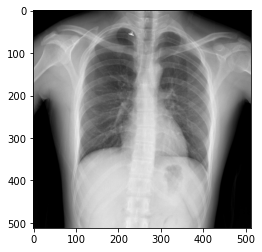

In [21]:
im=train_array[1500]
pyplot.imshow(im)
pyplot.show()

In [22]:
train_array_labels=np.array(TBX11K_train['Category(Integer)'])
train_array_labels=train_array_labels.reshape((len(train_array_labels), 1))

In [23]:
train_array_labels.shape

(6600, 1)

In [24]:
train_array_labels[1500]

array([2])

#### TBX11K_val labels and data 

In [25]:
TBX11K_val.sample(10)

,directory,Category(Label),FileName,Category(Integer)
1584,/home/jovyan/work/TBX11K/imgs/sick/s3648.png,sick,s3648.png,1
1451,/home/jovyan/work/TBX11K/imgs/sick/s2878.png,sick,s2878.png,1
807,/home/jovyan/work/TBX11K/imgs/health/h3769.png,health,h3769.png,2
131,/home/jovyan/work/TBX11K/imgs/tb/tb0792.png,tb,tb0792.png,0
1169,/home/jovyan/work/TBX11K/imgs/sick/s1111.png,sick,s1111.png,1
70,/home/jovyan/work/TBX11K/imgs/tb/tb0472.png,tb,tb0472.png,0
828,/home/jovyan/work/TBX11K/imgs/health/h3916.png,health,h3916.png,2
1213,/home/jovyan/work/TBX11K/imgs/sick/s1408.png,sick,s1408.png,1
912,/home/jovyan/work/TBX11K/imgs/health/h4413.png,health,h4413.png,2
750,/home/jovyan/work/TBX11K/imgs/health/h3416.png,health,h3416.png,2


In [26]:
val_array = np.array([np.array(Image.open(fname)) for fname in TBX11K_val['directory']])

In [27]:
val_array.shape

(1800, 512, 512, 3)

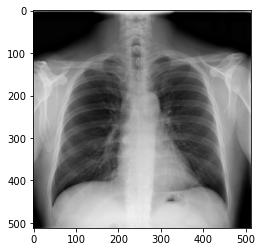

In [28]:
im=val_array[1500]
pyplot.imshow(im)
pyplot.show()

In [29]:
val_array_labels=np.array(TBX11K_val['Category(Integer)'])
val_array_labels=val_array_labels.reshape((len(val_array_labels), 1))

In [30]:
val_array_labels.shape

(1800, 1)

In [31]:
val_array_labels[1500]

array([1])

# Training the Model  (A lot needed to be improvised but this is the first draft yay!!!)

- train_array = X_train
- train_array_labels =y_train
- val_array = X_test
- val_array_labels = y_test

In [32]:
# renaming the array to work with the already existing models 
X_train= train_array
X_test=val_array 
y_train= train_array_labels 
y_test=val_array_labels

In [24]:
num_classes = 3
img_height, img_width=512, 512
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0

In [51]:
# training the model for 10 epochs with 1 batch size

model.fit(X_train, y_train, batch_size=12, epochs=10, validation_data=(X_test, y_test))

!mkdir -p saved_model
model.save('/home/jovyan/work/saveModel/tb_diagnosis_model.h5')



Epoch 1/10
550/550 [==============================] - 473s 860ms/step - loss: 0.0396 - accuracy: 0.9970 - val_loss: 1.8169 - val_accuracy: 0.9639
Epoch 2/10
550/550 [==============================] - 476s 865ms/step - loss: 3.1920e-04 - accuracy: 0.9998 - val_loss: 1.8390 - val_accuracy: 0.9633
Epoch 3/10
550/550 [==============================] - 474s 862ms/step - loss: 4.0801e-05 - accuracy: 1.0000 - val_loss: 1.8381 - val_accuracy: 0.9633
Epoch 4/10
550/550 [==============================] - 478s 869ms/step - loss: 2.9912e-05 - accuracy: 1.0000 - val_loss: 1.8371 - val_accuracy: 0.9633
Epoch 5/10
550/550 [==============================] - 472s 858ms/step - loss: 2.2535e-05 - accuracy: 1.0000 - val_loss: 1.8364 - val_accuracy: 0.9633
Epoch 6/10
550/550 [==============================] - 474s 862ms/step - loss: 1.7699e-05 - accuracy: 1.0000 - val_loss: 1.8361 - val_accuracy: 0.9639
Epoch 7/10
550/550 [==============================] - 476s 866ms/step - loss: 1.5601e-05 - accuracy: 1.0

In [33]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('/home/jovyan/work/saveModel/tb_diagnosis_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0